The data were generated using Monte Carlo simulations to model the detection of high-energy gamma particles with a ground-based atmospheric Cherenkov gamma telescope employing imaging techniques. This type of telescope observes high-energy gamma rays by detecting the radiation emitted by charged particles formed during electromagnetic showers caused by gamma rays in the atmosphere. The Cherenkov radiation, which includes visible to ultraviolet wavelengths, penetrates the atmosphere and is captured by the detector, enabling the reconstruction of shower parameters.
The available data consists of pulses from incoming Cherenkov photons detected by photomultiplier tubes arranged in a camera plane. Depending on the energy of the primary gamma, the system can collect a few hundred to around 10,000 Cherenkov photons, which form patterns known as shower images. These images allow for statistical differentiation between those caused by primary gammas (signal) and those resulting from hadronic showers initiated by cosmic rays in the upper atmosphere (background).



Importing All the required 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sys import version_info 
python_version = f"{version_info.major}.{version_info.minor}"
print(python_version)

In [ ]:
data_file = "magic04.data"
var_names = [
    "fLength",        # major axis of ellipse [mm]
    "fWidth",         # minor axis of ellipse [mm]
    "fSize",          # 10-log of sum of content of all pixels [in #phot]
    "fConc",          # ratio of sum of two highest pixels over fSize [ratio]
    "fConc1",         # ratio of highest pixel over fSize [ratio]
    "fAsym",          # distance from highest pixel to center, projected onto major axis [mm]
    "fM3Long",        # 3rd root of third moment along major axis [mm]
    "fM3Trans",       # 3rd root of third moment along minor axis [mm]
    "fAlpha",         # angle of major axis with vector to origin [deg]
    "fDist",          # distance from origin to center of ellipse [mm]
    "class"           # gamma (signal), hadron (background)
]
    
# read from text file
df_data = pd.read_csv(data_file, sep =",", names=var_names)
df_data2 = df_data.copy()
# examine data types
df_data.dtypes
df_data2.head()

In [ ]:
column = df_data['class']

column.value_counts() 

In [ ]:
df_data2.describe()

In [ ]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [ ]:
df_data2.dtypes

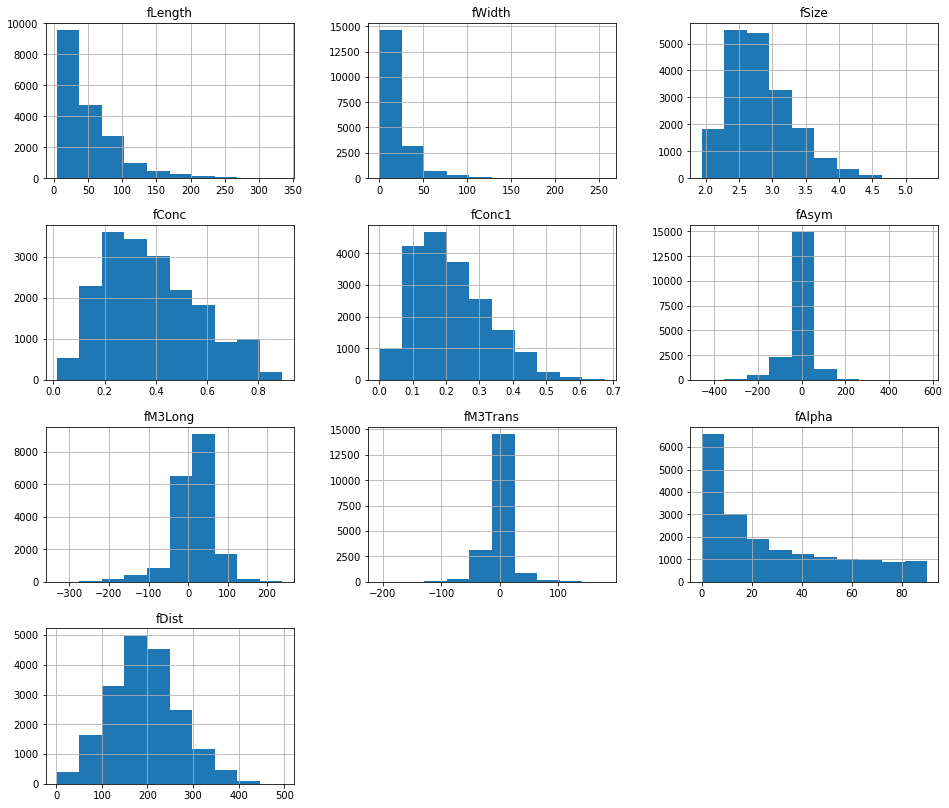

In [8]:
# produce some histograms
df_data2.hist(figsize=(16, 14));

In [9]:
# Check missing values 
df_data2.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

### Logistic Regression

Logistic regression is a statistical and machine learning model used for binary and multi-class classification problems. It models the probability that a given input belongs to a certain class and is particularly useful for predicting categorical outcomes based on a set of input features.
Now we want to separate the feature columns (independent variables) from the target column (dependent variable or class). Splitting the data into train and the test set in the ratio of 70-30 percent of the data 
using the `LogisticRegression` class from the `sklearn.linear_model module` to train a logistic regression model, fit it to training data and then use the fitted model to make predictions on test data.




In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


attributes = [col for col in var_names if col != "class"]
train_x1, test_x1, train_y1, test_y1 = train_test_split(df_data[attributes], df_data["class"], test_size=0.3, random_state=123)

Here, generating a detailed report on the classification performance of a machine learning model. It then prints each line of the report separately.

In [11]:
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)

# train model
model1 = algorithm.fit(train_x1, train_y1)
# make prediction
pred_y = model1.predict(test_x1)

#evaluate the prediction results
from sklearn.metrics import classification_report
for line in classification_report(test_y1, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           g       0.80      0.89      0.85      3741
           h       0.74      0.59      0.66      1965

    accuracy                           0.79      5706
   macro avg       0.77      0.74      0.75      5706
weighted avg       0.78      0.79      0.78      5706



- The model performs well in classifying class 'g' with high precision and recall, resulting in a good F1-score.
- The model's performance is lower for class 'h', as indicated by the lower precision, recall, and F1-score.
- Overall, the model achieves an accuracy of 79%, which is a decent performance.
- The weighted averages account for the imbalance in support between the two classes and provide a better summary of overall model performance than macro averages.

In summary, the model performs better in classifying class 'g' compared to class 'h'. Improving the model's performance on class 'h' could be beneficial for overall accuracy and balance.

In [12]:
from sklearn.metrics import roc_auc_score

pred_prob = model1.predict_proba(test_x1)

# auc scores
auc_score = roc_auc_score(test_y1, pred_prob[:,1])

print(auc_score)

0.8415896200074411


In summary, the above code calculates the AUC score for the model's predictions on the test set, and prints the result, providing an indication of how well the model can discriminate between positive and negative classes.
for our model the AUC score is 0.834 which indicates that the model has some discriminatory power also the model is good at distinguishing between classes.

In [13]:

for var in var_names:
    if df_data2[var].dtype == object:
        df_data2 = pd.get_dummies(df_data2, prefix=var, columns=[var], drop_first=True)

print(df_data2.dtypes)
print(df_data2.head(5))

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class_h       uint8
dtype: object
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class_h  
0  40.0920   81.8828        0  
1   6.3609  205.2610        0  
2  76.9600  256.7880        0  
3  10.4490  116.7370        0  
4   4.6480  356.4620        0  


In [14]:
from sklearn.model_selection import train_test_split
attributes2 = [col for col in var_names if col != "class"]
train_x2, test_x2, train_y2, test_y2 = train_test_split(df_data2[attributes2], df_data["class"], test_size=0.3, random_state=123)

In [15]:
train_y2.head()

10205    g
2303     g
16210    h
5711     g
5852     g
Name: class, dtype: object

 ### Simple Vector Machine (SVM)
 Now, creating a support vector machine (SVM) model with different regularization parameters. Support vector machine (SVM) is a supervised machine learning algorithm used in classification and regression problems. SVM uses a hyperplane that acts as the decision boundary to classify the data.

In [16]:
from sklearn.svm import SVC
i = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for c in i: 
    algorithm = SVC(C = c, probability=True)
    print(algorithm)
# train model
    model2 = algorithm.fit(train_x2, train_y2)
# make prediction
    pred_y = model2.predict(test_x2)
    
# print evaluation measures
    for line in classification_report(test_y2, pred_y).split("\n"):
        print(line)
        

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.85      0.54      0.66      1965

    accuracy                           0.81      5706
   macro avg       0.82      0.75      0.76      5706
weighted avg       0.82      0.81      0.80      5706

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.86      0.56      0.68      1965

    accurac

- The model performs very well in classifying class 'g' with high precision and recall, resulting in a good F1-score.
- The model's performance for class 'h' is less strong, as indicated by the lower recall and F1-score. While precision is high, recall is much lower, indicating the model may be under-identifying instances of class 'h'.
- The overall accuracy of 0.82 (first occurrence) and 0.83 (second occurrence) indicates a good performance of the model.
- The macro and weighted averages provide a summary of the model's performance across both classes.

In summary, the model shows better performance for class 'g' compared to class 'h'. Improving the model's recall for class 'h' could further improve the overall performance.

In [ ]:
sv_probs = model2.predict_proba(test_x2)
# keeping probabilities for the positive outcome only
sv_probs = sv_probs[:, 1]
sv_auc = roc_auc_score(test_y2, sv_probs)
print(sv_auc)